# Boston Airbnb - Data Wrangling and Exploration

### Jia Du

this dataset describes the listing activity of homestays in Boston, MA. (https://www.kaggle.com/airbnb/boston)

The following Airbnb activity is included in this Boston dataset:

- Listings, including full descriptions and average review score <br>
- Reviews, including unique id for each reviewer and detailed comments <br>
- Calendar, including listing id and the price and availability for that day <br>

Questions to investigate:
1. What is the trend of the listing price over the time? <br>
2. What affects the price most considering number of bedrooms and bathrooms, square feet and overall reviews? <br>
3. How does the location, property type, room type and bed type impact the listing price?

### Table of Contents

1. [Gathering Data](#gathering_data)

2. [Assessing Data](#assessing_data)

3. [Cleaning Data](#cleaning_data)

4. [Data Exploration](#data_exploration)

### 1. Gathering Data 

<a id="gathering_data"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
boston_cal = pd.read_csv('boston_calendar.csv')
boston_listing = pd.read_csv('boston_listings.csv')
boston_rev = pd.read_csv('boston_reviews.csv')

### 2. Assessing Data  <a id="assessing_data"></a>

In [3]:
boston_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
boston_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [5]:
# total number of missing values in the boston_cal dataframe
boston_cal.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [6]:
boston_cal.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [7]:
boston_cal.listing_id.nunique() # The total number of listing ids in the calendar dataframe

3585

In [8]:
boston_cal.price.isna().sum()/boston_cal.shape[0] # percentage of the unavailable price in calendar dataframe

0.5087157820748879

In [9]:
boston_cal[boston_cal.available == 'f'].shape[0]/boston_cal.shape[0] # percentage of the unavailable lists

0.5087157820748879

In [10]:
# The listings that do not have price are not available
boston_cal[boston_cal.price.isna()][boston_cal.available != 'f']

/Users/jiadu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,listing_id,date,available,price


- There are about 50.8% of the listings are not available, and the listings that do not have price are not available as well. <br>
- There are 665853 missing values in the price, and this is because the corresponding listings are unavailable. The missing value in price column can be dropped.

In [11]:
# The true or false of the listing id in the calendar indicates whether that listing_id is available or not
# We assume that when it is false, the property is rented out
listing_id_popularity = boston_cal.groupby('listing_id')['available'].value_counts().to_frame().rename(columns={'available':'counts'}).reset_index()
listing_id_popularity = listing_id_popularity.pivot(index='listing_id', columns='available', values='counts')

In [12]:
listing_id_popularity = listing_id_popularity.fillna(0) # in cases when there is no availability or available all the time

In [13]:
listing_id_popularity['popularity'] = listing_id_popularity.f/(listing_id_popularity.t+listing_id_popularity.f)

In [14]:
listing_id_popularity = listing_id_popularity.reset_index()

In [15]:
listing_id_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  3585 non-null   int64  
 1   f           3585 non-null   float64
 2   t           3585 non-null   float64
 3   popularity  3585 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 112.2 KB


In [16]:
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [17]:
boston_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

The columns that are relevant to our further exploration are:
1. id
2. neighbourhood_cleansed
3. city
4. state
5. zipcode
6. smart_location
7. property_type
8. room_type
9. accommodates
10. bathrooms
11. bedrooms
12. beds
13. bed_type
14. square_feet
15. price
16. weekly_price
17. monthly_price
18. review_scores_rating
19. review_scores_accuracy
20. review_scores_cleanliness
21. review_scores_checkin
22. review_scores_communication
23. review_scores_location
24. review_scores_value




In [18]:
cols_nan = boston_listing.columns[boston_listing.isnull().mean() > 0.5] # The columns that have more than half of the data are missing
cols_nan

Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [19]:
boston_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [20]:
boston_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


### Quality Issues

boston_cal <br>

- The data type in date is object.<br>
- The data type in price is object.<br>


boston_listing <br>

- There is not values in the column experiences_offered.<br>
- There are NANs in the columns that we would like to explore<br>
- The price in the column is object
- There are more than half of the data missing in the square_feet column, which is related to our exploration


### Tideness Issues
- Select relevant columns in the boston_listing dataframe for further exploration<br>
- boston_rev dataframe is not relevant to our exploration at this time<br>

### Cleaning Data <a id="cleaning_data"></a>

In [21]:
boston_cal_clean = boston_cal.copy()
boston_listing_clean = boston_listing.copy()

#### Define:

The data type in date is object
The data type in price is object

#### Code: 
use pd.to_datetime() to convert the time to datetime object <br>
use pd.to_numeric() to change the price object to int

In [22]:
boston_cal_clean['date'] = pd.to_datetime(boston_cal_clean.date)

In [23]:
def price_convert(col):
    
    '''
    Change the object of the price to float.
    The column of the price is in the format of $xxx.xx will be passed to the function.
    And price in float will be returned
    '''
    return pd.to_numeric(col.dropna().str.replace('$', '').str.replace(',', ''))

In [24]:
boston_cal_clean['price'] = price_convert(boston_cal_clean.price)

#### Test

In [25]:
boston_cal_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 39.9+ MB


#### Define:
There is no data in the columns experiences_offered
Many columns in the boston_listing is not relevant to our exploration

#### Code:
use df[] to select the columns we would like to use in the exploration

In [26]:
boston_listing_clean = boston_listing_clean[['id', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'smart_location', 
                                            'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                                            'bed_type', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'review_scores_rating',
                                            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                                            'review_scores_communication', 'review_scores_location', 'review_scores_value']]

#### Test

In [27]:
boston_listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3585 non-null   int64  
 1   neighbourhood_cleansed       3585 non-null   object 
 2   city                         3583 non-null   object 
 3   state                        3585 non-null   object 
 4   zipcode                      3547 non-null   object 
 5   smart_location               3585 non-null   object 
 6   property_type                3582 non-null   object 
 7   room_type                    3585 non-null   object 
 8   accommodates                 3585 non-null   int64  
 9   bathrooms                    3571 non-null   float64
 10  bedrooms                     3575 non-null   float64
 11  beds                         3576 non-null   float64
 12  bed_type                     3585 non-null   object 
 13  square_feet       

In [28]:
boston_listing_clean.price.isna().sum()

0

In [29]:
boston_listing_clean.weekly_price.isna().sum()

2693

In [30]:
boston_listing_clean.monthly_price.isna().sum()

2697

There are many missing values in the weekly and monthly price columns. Those properties may not provide the long-term renting

#### Define
The values in the price, weekly_price, and monthly_price is object

#### Code
use pd.to_numeric() to change the price object to int

In [31]:
boston_listing_clean['price'] = price_convert(boston_listing_clean.price)

In [32]:
boston_listing_clean['weekly_price'] = price_convert(boston_listing_clean.weekly_price)

In [33]:
boston_listing_clean['monthly_price'] = price_convert(boston_listing_clean.monthly_price)

#### Test

In [34]:
boston_listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3585 non-null   int64  
 1   neighbourhood_cleansed       3585 non-null   object 
 2   city                         3583 non-null   object 
 3   state                        3585 non-null   object 
 4   zipcode                      3547 non-null   object 
 5   smart_location               3585 non-null   object 
 6   property_type                3582 non-null   object 
 7   room_type                    3585 non-null   object 
 8   accommodates                 3585 non-null   int64  
 9   bathrooms                    3571 non-null   float64
 10  bedrooms                     3575 non-null   float64
 11  beds                         3576 non-null   float64
 12  bed_type                     3585 non-null   object 
 13  square_feet       

In [35]:
# Save the cleaned data as separate csv files
boston_cal_clean.to_csv('boston_calendar_master.csv')
boston_listing_clean.to_csv('boston_listings_master.csv')

In [36]:
listing_id_popularity.to_csv('occupancy_rate.csv')

#### Define
Missing data in the column square_feet

#### Code
Check the plots with and without missing data in square_feet

In [37]:
# correlation of square feet and price with missing value kept
corr_na = boston_listing_clean.price.corr(boston_listing_clean.square_feet)
corr_na

0.44779462383779445

In [38]:
# correlation of square feet and price with missing value removed
boston_listing_clean_na = boston_listing_clean.dropna(subset=['square_feet'])
corr_na_removed = boston_listing_clean_na.price.corr(boston_listing_clean_na.square_feet)
corr_na_removed

0.44779462383779445

There is no difference between keeping and removing the missing value in calculating the correlation coefficient of price and square feet. The NA values is not considered when calculating the number using corr() function.

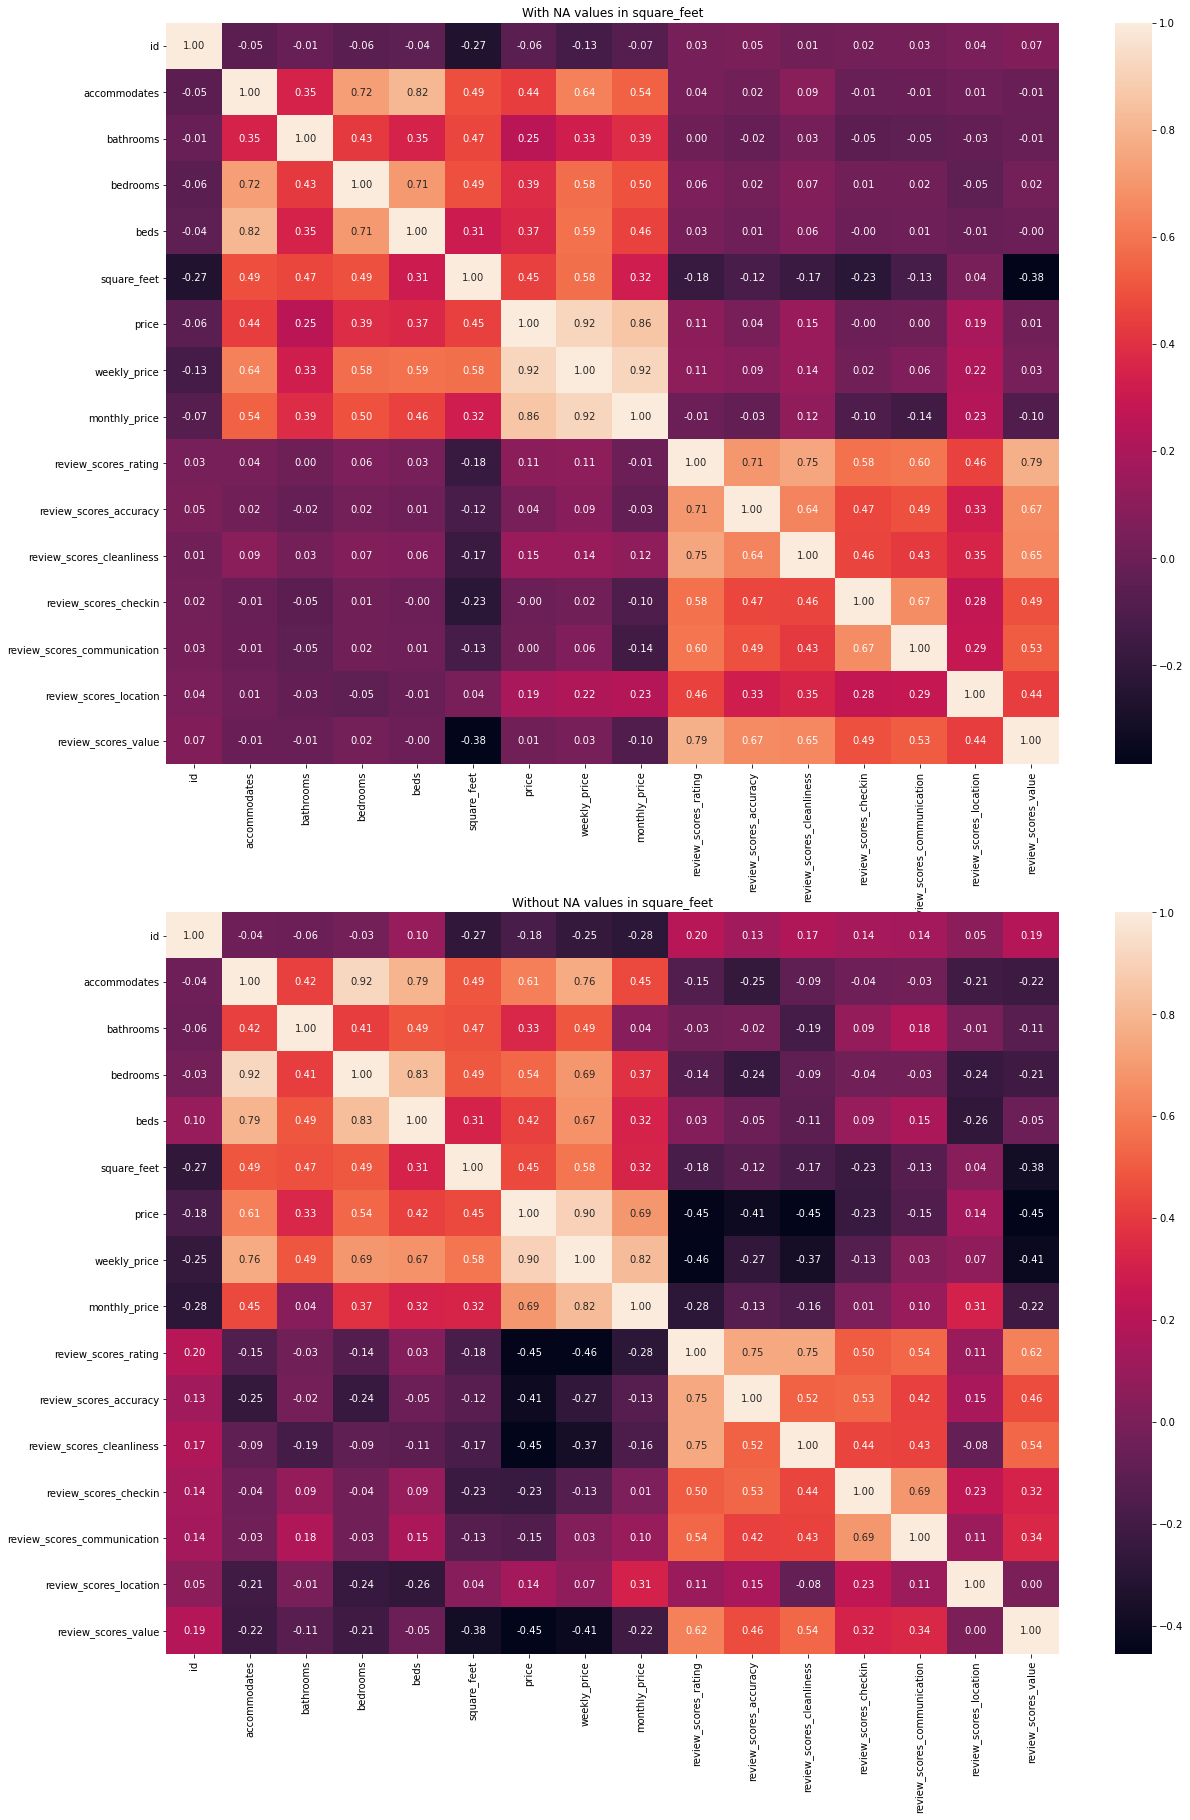

In [39]:
# The correlation of the numeric variables are revealed by the heatmap with keeping the NA values in square_feet.
plt.figure(figsize=(20, 30))
plt.subplot(2, 1, 1)
sns.heatmap(boston_listing_clean.corr(), annot=True, fmt='.2f')
plt.title('With NA values in square_feet')

# The correlation of the numeric variables are revealed by the heatmap with removed NA values in square_feet.
boston_listing_clean_na = boston_listing_clean.dropna(subset=['square_feet'])

plt.subplot(2, 1, 2)
sns.heatmap(boston_listing_clean_na.corr(), annot=True, fmt='.2f')
plt.title('Without NA values in square_feet');

By comparing the two plots, we see that the correlation coefficient are quite different before and after removing the NA values in the square_feet column. But the overall color pattern are still the same. This is because many valide data points in other columns were removed as well while dropping the NA values in the sqaure_feet column. Since correlation coefficient calculation is not affected by the present NA values, we will keep the NAs in the columns for further exploration. 

### Data Exploration <a id="data_exploration"></a>

Price distribution

In [40]:
calendar = boston_cal_clean.copy()
listing = boston_listing_clean.copy()

In [41]:
calendar.price.describe()

count    643037.000000
mean        198.438909
std         180.142913
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max        7163.000000
Name: price, dtype: float64

In [42]:
calendar.loc[110179, 'price'] = 71

In [43]:
calendar.price.describe(percentiles=[0.05, 0.5, 0.95])

count    643037.000000
mean        198.427881
std         179.933495
min          11.000000
5%           50.000000
50%         150.000000
95%         490.000000
max        4000.000000
Name: price, dtype: float64

From the above description, majority (95%) of the listing prices are less than 500. we will focus on the data with listing price less than $500, and it is more likely to be the Airbnb listing price and close to customer's expectations. 

#### 1. What is the trend of the listing price over the time?

In [44]:
calendar = calendar.query('price <= 500')

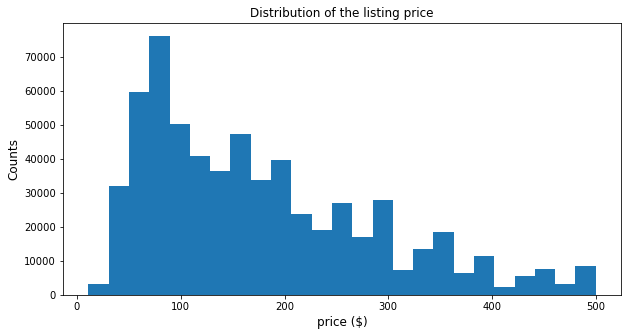

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(calendar.price, bins=25)
plt.title('Distribution of the listing price', fontsize=12)
plt.xlabel('price ($)', fontsize=12)
plt.ylabel('Counts', fontsize=12);

In [46]:
date_price = calendar.groupby('date').mean().reset_index().drop('listing_id', axis=1)

In [47]:
date_price.head()

,date,price
0,2016-09-06,209.209924
1,2016-09-07,227.161883
2,2016-09-08,222.601931
3,2016-09-09,231.669613
4,2016-09-10,231.690639


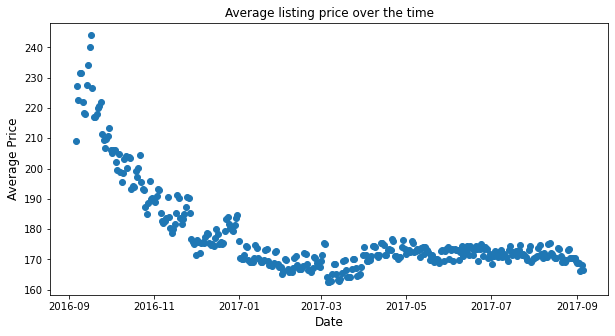

In [48]:
# The average price of the listing over the time from 2016-09 to 2017-09
plt.figure(figsize=(10, 5))
plt.scatter(data=date_price, x='date', y='price')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average listing price over the time', fontsize=12);

In [49]:
date_listing = calendar.date.value_counts(sort=False)
date_listing_df = pd.DataFrame(date_listing)
date_listing_df = date_listing_df.reset_index()
date_listing_df.columns = ['date', 'counts'];

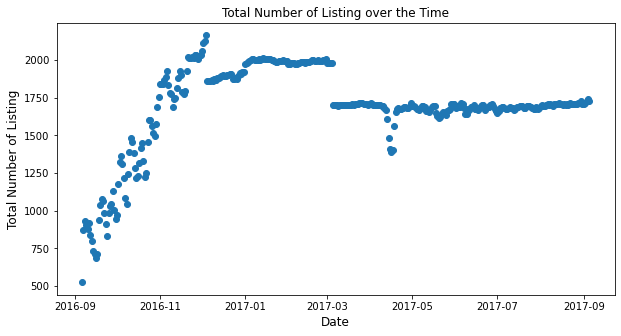

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(data=date_listing_df, x='date', y='counts')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Number of Listing', fontsize=12)
plt.title('Total Number of Listing over the Time', fontsize=12);

The price drop is observed while the total number of listing was increasing, especially from 2016-09 to 2016-12. In 2017, the total number of listing is relatively steady, and the same as the listing price.

In [51]:
listing.price.describe(percentiles=[0.02, 0.5, 0.98])

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
2%         40.000000
50%       150.000000
98%       500.000000
max      4000.000000
Name: price, dtype: float64

In [52]:
# Remove the data points with listing price over $500
listing_modified = listing[listing.price <= 500]

In [53]:
listing_modified.zipcode.value_counts()

02116          377
02130          327
02118          237
02215          231
02134          230
02114          225
02127          176
02135          171
02115          164
02128          146
02125          129
02120          114
02113          100
02111           99
02119           98
02129           86
02124           80
02210           69
02108           69
02131           65
02109           50
02122           44
02132           37
02136           29
02121           29
02126           24
02110           13
02145           12
02446            8
02143            7
02138            6
02139            6
02467            5
02445            5
02163            3
02141            3
02108 02111      1
02218            1
02472            1
02186            1
02134-1704       1
02142            1
02169            1
Name: zipcode, dtype: int64

There are two problematic zipcode in the listing dataframe
1. 02108 and 02111 in the same cell. Since both 02108 and 02111 belong to the boston, MA area, I will remove 02111 in that cell and keep 02108
2. 02134-1704 will be changed to 02134

In [54]:
listing_modified.loc[listing.zipcode=='02108 02111', 'zipcode'] = '02108'
listing_modified.loc[listing.zipcode=='02134-1704', 'zipcode'] = '02134'

/Users/jiadu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


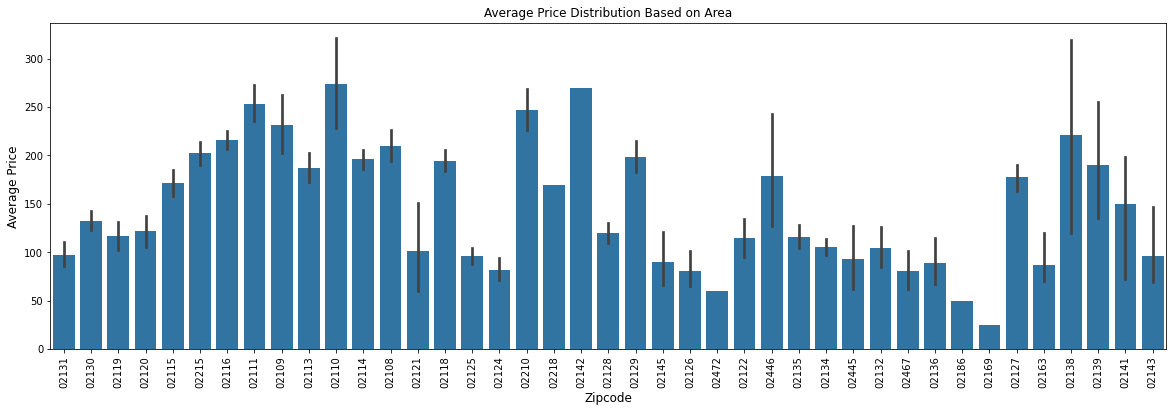

In [55]:
# Average price distribution according to the listing zipcodes
base_color = sns.color_palette()[0]
plt.figure(figsize=(20,6))
sns.barplot(data=listing_modified, x='zipcode', y='price', color=base_color)
plt.xticks(rotation=90);
plt.xlabel('Zipcode', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Price Distribution Based on Area', fontsize=12);

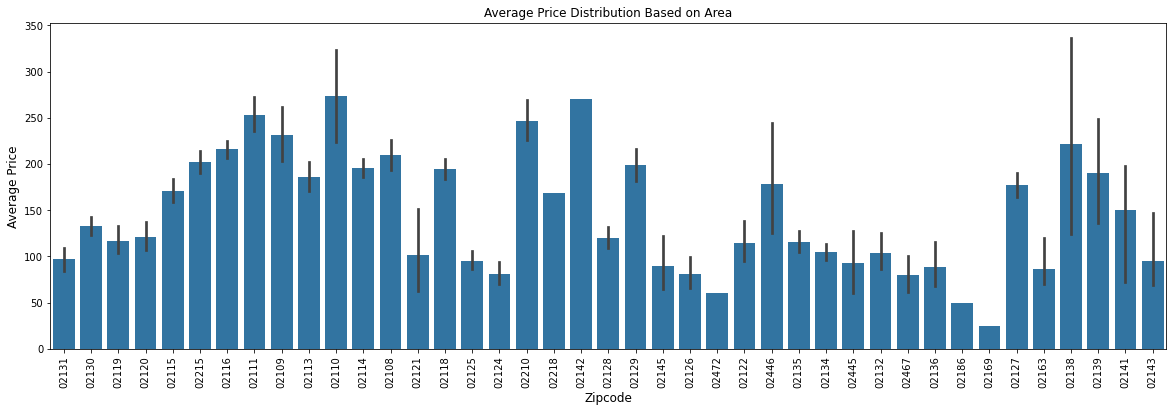

In [56]:
# Average price (listing price < $500) distribution according to the listing zipcodes
base_color = sns.color_palette()[0]
plt.figure(figsize=(20,6))
sns.barplot(data=listing_modified[listing_modified.price <= 500], x='zipcode', y='price', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Zipcode', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Price Distribution Based on Area', fontsize=12);

#### 2. What affects the price most considering number of bedrooms and bathrooms, square feet and overall reviews?

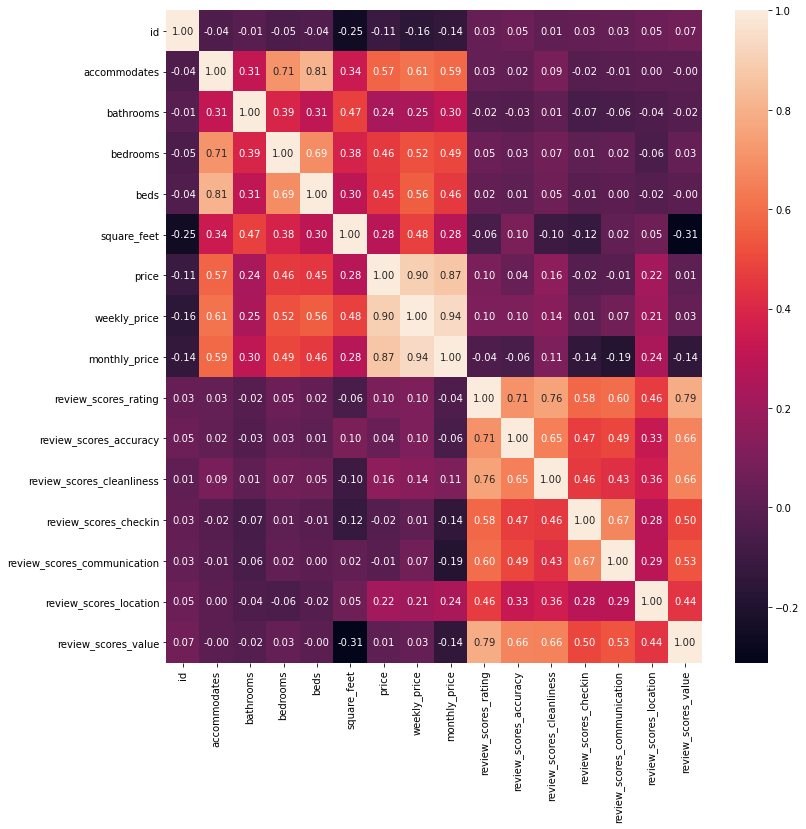

In [57]:
# The correlation of the numeric variables are revealed by the heatmap.
plt.figure(figsize=(12,12))
sns.heatmap(listing_modified.corr(), annot=True, fmt='.2f');

From the above heatmap, we find that the price is somehow correlated to the accommodates, bedrooms, and square_feet. The price is not relevant to the reviews in any aspect.

In [58]:
listing_modified[listing_modified.city == '波士顿']

,id,neighbourhood_cleansed,city,state,zipcode,smart_location,property_type,room_type,accommodates,bathrooms,...,price,weekly_price,monthly_price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
485,4625517,Mission Hill,波士顿,MA,02115,"波士顿, MA",House,Private room,2,1.0,...,100.0,500.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# There is Chinese in the city column, change '波士顿' Boston
listing_modified.loc[485, 'city'] = 'Boston'

/Users/jiadu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### 3. How does the location, property type, room type and bed type impact the listing price?

In [60]:
categorical_list = ['neighbourhood_cleansed', 'city', 'property_type', 'room_type', 'bed_type']

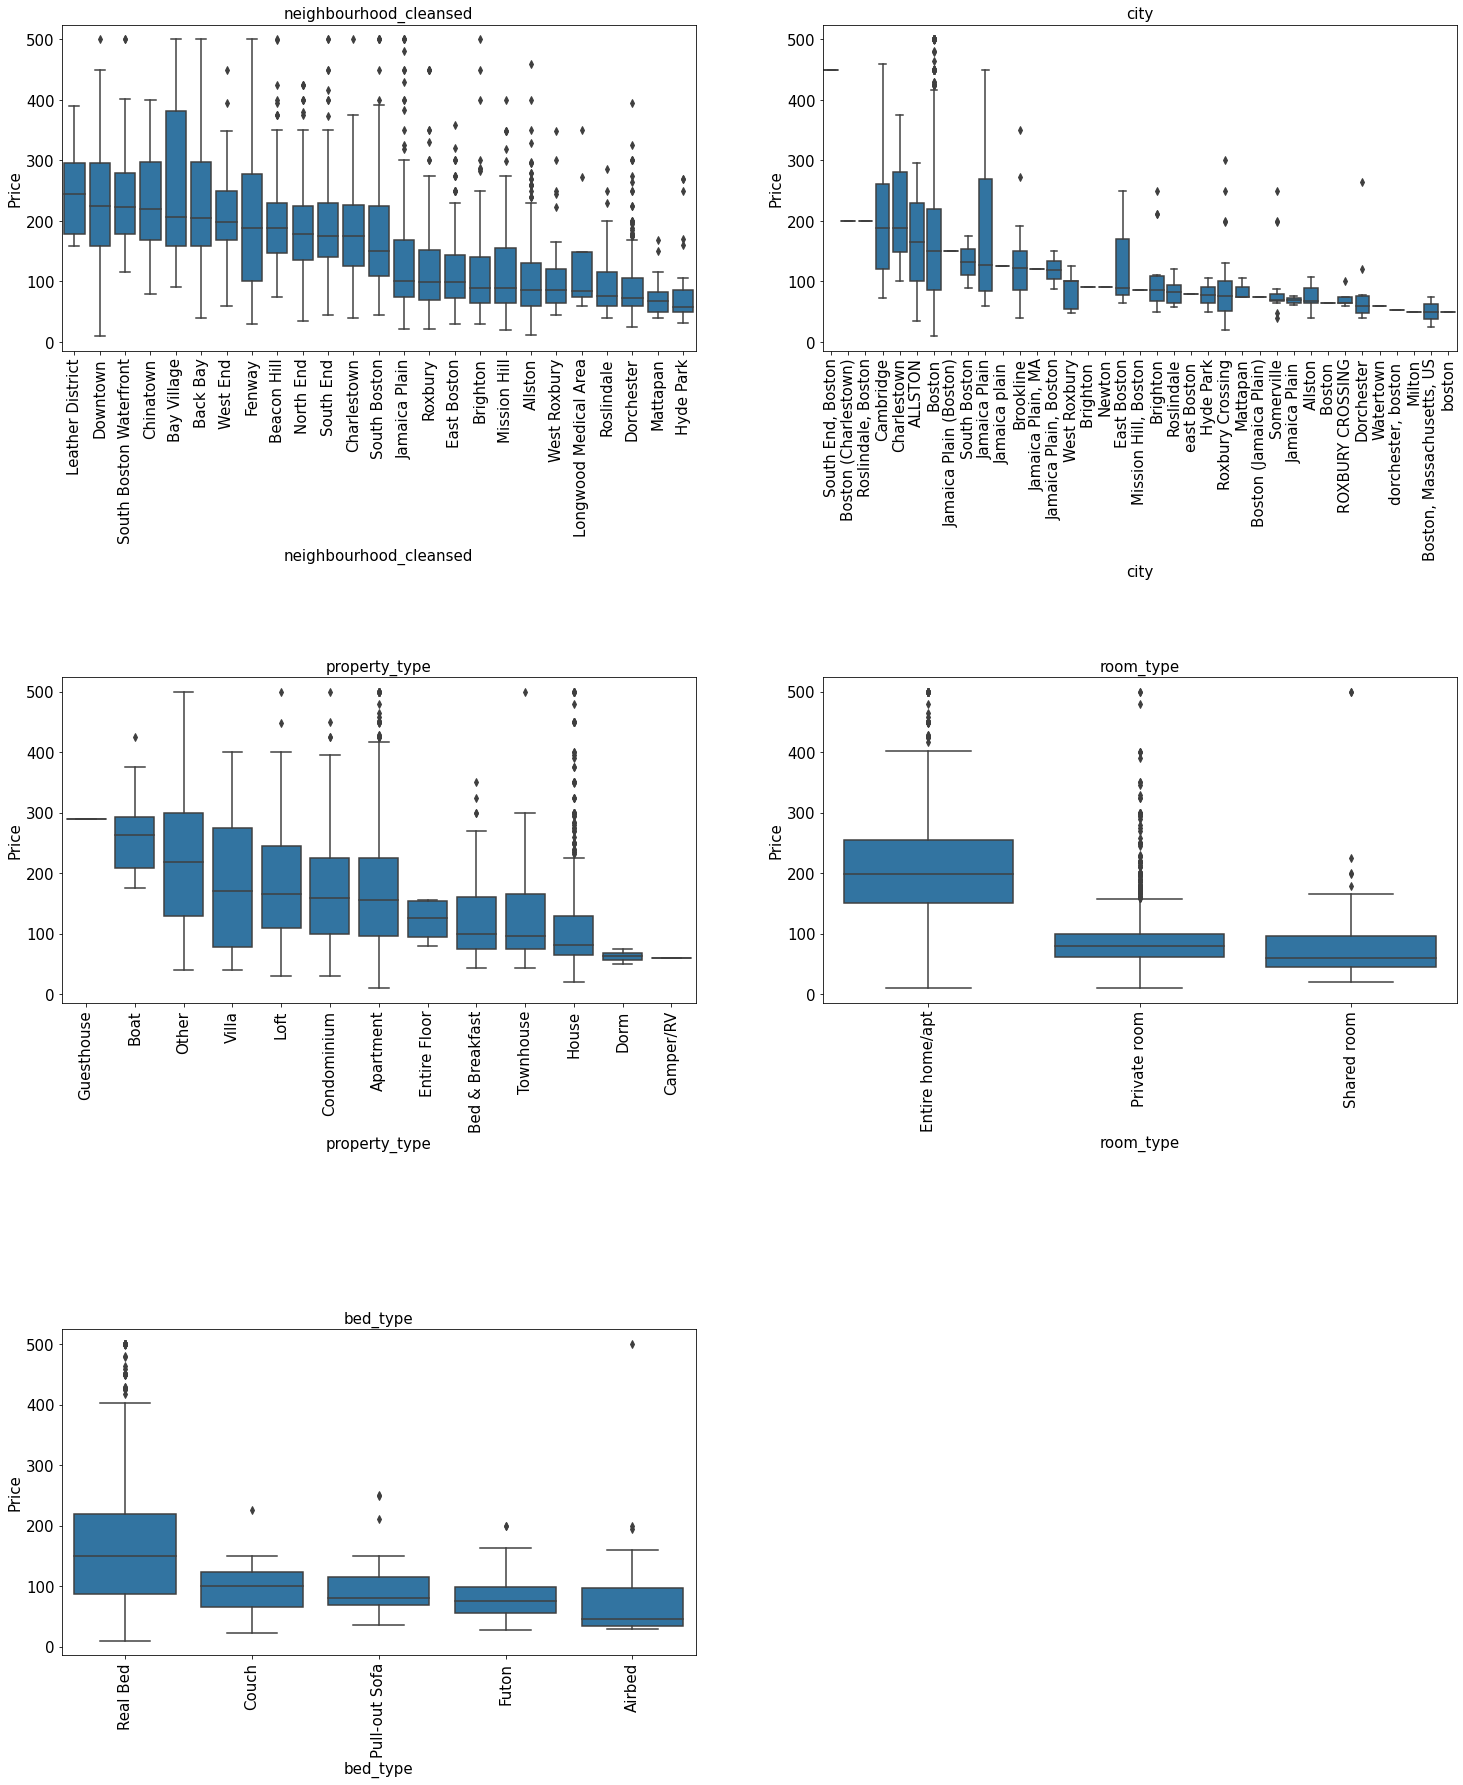

In [61]:
plt.figure(figsize=(25, 30))

# Plot boxplot for each individual categorical variable vs price

# The total number of categorical variables in listing dataframe
n = len(categorical_list)

for i in range(len(categorical_list)):
    plt.subplot((n+1)//2, 2, i+1)
    order = listing_modified.groupby(categorical_list[i]).price.median().reset_index().sort_values('price', ascending=False)[categorical_list[i]].to_list()
    sns.boxplot(data=listing_modified, x=categorical_list[i], y='price', order=order, color=base_color)
    plt.xticks(fontsize=15, rotation=90)
    plt.yticks(fontsize=15)
    plt.ylabel('Price', fontsize=15)
    plt.xlabel(categorical_list[i], fontsize=15)
    plt.title(categorical_list[i], fontsize=15)
    plt.subplots_adjust(hspace=1.0, wspace=0.2);

From the above boxplots, we have the following observations based on the median price:
1. The top three neighbourhood are Leather District, Downtown, and South Boston Waterfront. These three areas attract most tourists and have convenient public transportation.
2. By looking at the plot of property types, the special properties, such as guesthouse, boat, villa, and loft, have relatively higher median price than the traditional properties. Their specialties can provide different staying experience, so that their price is higher as well.
3. The relationship between the room type and price does make sense. The entire home/apartment has the highest price, while the shared room is cheapest.
4. In terms of the bed type, the unit provides the real bed has higher median price than the others. Providing a comfortable staying experience is important in being listed at higher price

In [62]:
# Save the corrected dataframes for future use
calendar.to_csv('boston_calendar_master2.csv')
listing_modified.to_csv('boston_listings_master2.csv')